Exercise 1: Feature Selection with SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

#объект, для определения 2 лучших признака 
selector = SelectKBest(score_func=chi2, k=2)

#обучает модель для оценки значимости признаков
X_new = selector.fit_transform(X, y)

#получение индексов признаков
selected_features = selector.get_support(indices=True)

#список названий признаков 
feature_names = [iris.feature_names[i] for i in selected_features]

print("Выбранные признаки:", feature_names)

Exercise 2: Feature Importance with Random Forest

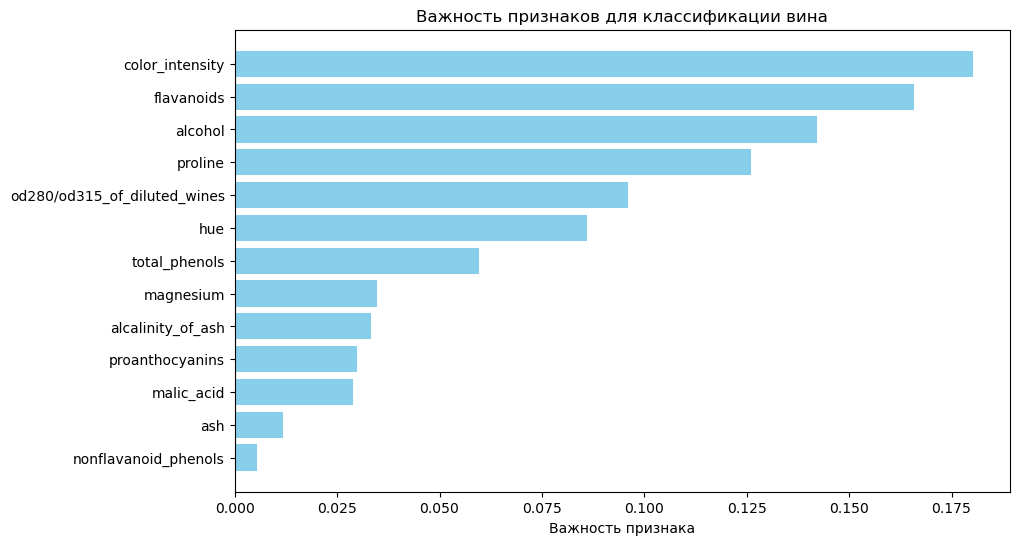

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd


wine = load_wine()
X = wine.data
y = wine.target

#разделение на обучающий и тестовый наборы (30% на тест, 70% на обучение)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#обучение классификатора случайного леса на обучающих данных
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

#извлечение важности признаков
importances = clf.feature_importances_

#Визуализация важности признаков
#Преобразование важностей в Pandas DataFrame для удобства
feature_names = wine.feature_names
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

#сортировка по значению важности
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

#визуализация
plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color='skyblue')
plt.xlabel("Важность признака")
plt.title("Важность признаков для классификации вина")
plt.gca().invert_yaxis()
plt.show()

Exercise 3: Recursive Feature Elimination (RFE)

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

#разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#использование RFE с классификатором Support Vector Machine (SVM)
#определяем классификатор SVM
svc = SVC(kernel="linear")

#применяем RFE с классификатором SVM, выбрав 10 наиболее важных признаков
selector = RFE(estimator=svc, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

#получение обучающих и тестовых данных с выбранными признаками
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

#обучение модели SVM с выбранными признаками
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_rfe, y_train)

#оценка производительности модели на тестовом наборе
y_pred = svm_model.predict(X_test_rfe)

#отчет о классификации и метрики
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

#вывод метрики точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовом наборе: {accuracy:.4f}")

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.94      0.95      0.94       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Точность модели на тестовом наборе: 0.9298


Exercise 4: L1 Regularization for Feature Selection

Коэффициенты Lasso-регрессии: [   0.         -173.27107577  558.93812468  339.35373951  -58.72068535
   -0.         -274.11351588    0.          372.83897776   25.58680152]
Выбранные признаки (индексы): [1 2 3 4 6 8 9]
Среднеквадратичная ошибка (MSE) на тестовом наборе: 2782.72
Коэффициент детерминации (R2) на тестовом наборе: 0.48


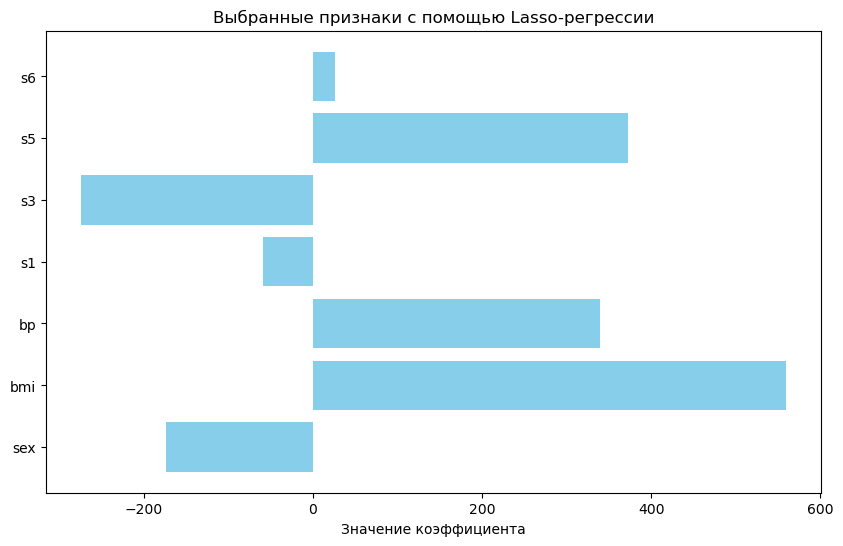

In [54]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#применение регрессии лассо для выбора признаков
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

#получение коэффициентов модели (выбранные признаки имеют ненулевые коэффициенты)
lasso_coef = lasso.coef_
print("Коэффициенты Lasso-регрессии:", lasso_coef)

#выбор только значимых признаков (ненулевых коэффициентов)
selected_features = np.where(lasso_coef != 0)[0]
print("Выбранные признаки (индексы):", selected_features)

#получение нового обучающего и тестового наборов с выбранными признаками
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

#обучение линейной модели на выбранных признаках
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

#прогнозирование на тестовом наборе
y_pred = linear_model.predict(X_test_selected)

#оценка эффективности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE) на тестовом наборе: {mse:.2f}")
print(f"Коэффициент детерминации (R2) на тестовом наборе: {r2:.2f}")

#визуализация важности признаков
feature_names = diabetes.feature_names
lasso_importance = pd.DataFrame({'Признак': feature_names, 'Коэффициент': lasso_coef})
lasso_importance = lasso_importance[lasso_importance['Коэффициент'] != 0]

#построение диаграммы
plt.figure(figsize=(10, 6))
plt.barh(lasso_importance['Признак'], lasso_importance['Коэффициент'], color='skyblue')
plt.xlabel('Значение коэффициента')
plt.title('Выбранные признаки с помощью Lasso-регрессии')
plt.show()


Classification Exercises
Exercise 1: Logistic Regression

Точность модели на тестовом наборе: 1.00


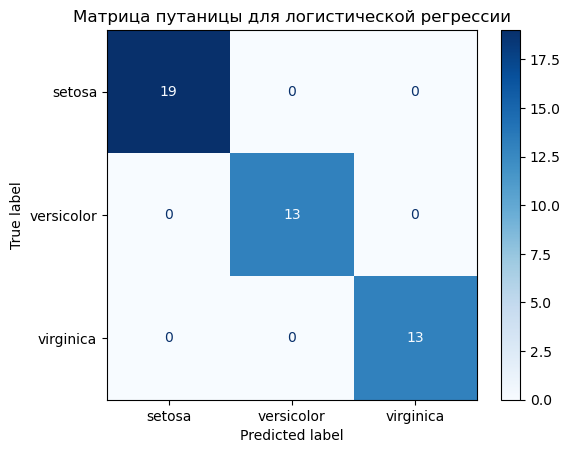

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#обучение модели логистической регрессии на обучающем наборе
log_reg = LogisticRegression(max_iter=200)  
log_reg.fit(X_train, y_train)

#оценка производительности модели на тестовом наборе
y_pred = log_reg.predict(X_test) 

#точность модели (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовом наборе: {accuracy:.2f}")

#матрица путаницы (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

#визуализация матрицы путаницы
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Матрица путаницы для логистической регрессии")
plt.show()

Exercise 2: Support Vector Machine (SVM)


Точность модели на тестовом наборе: 0.96


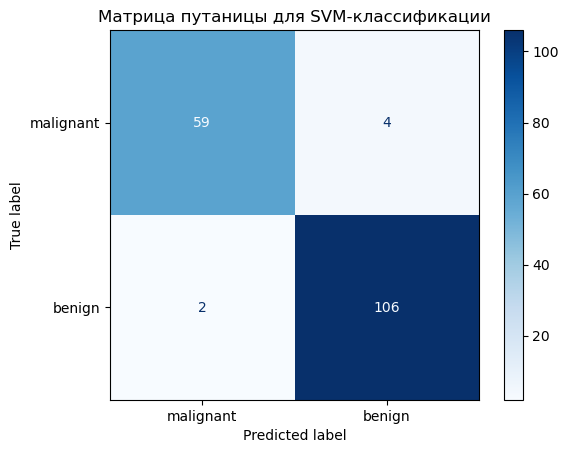

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()
X = breast_cancer.data  
y = breast_cancer.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#обучение модели SVM на обучающих данных
svm_model = SVC(kernel='linear', random_state=42)  
svm_model.fit(X_train, y_train)  

#оценка производительности модели на тестовых данных
y_pred = svm_model.predict(X_test) 

#точность модели (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовом наборе: {accuracy:.2f}")

#татрица путаницы (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

#визуализация матрицы путаницы
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=breast_cancer.target_names)
disp.plot(cmap='Blues')
plt.title("Матрица путаницы для SVM-классификации")
plt.show()

In [ ]:
Exercise 3: Decision Tree Classifier

Точность классификации на тестовом наборе: 0.96


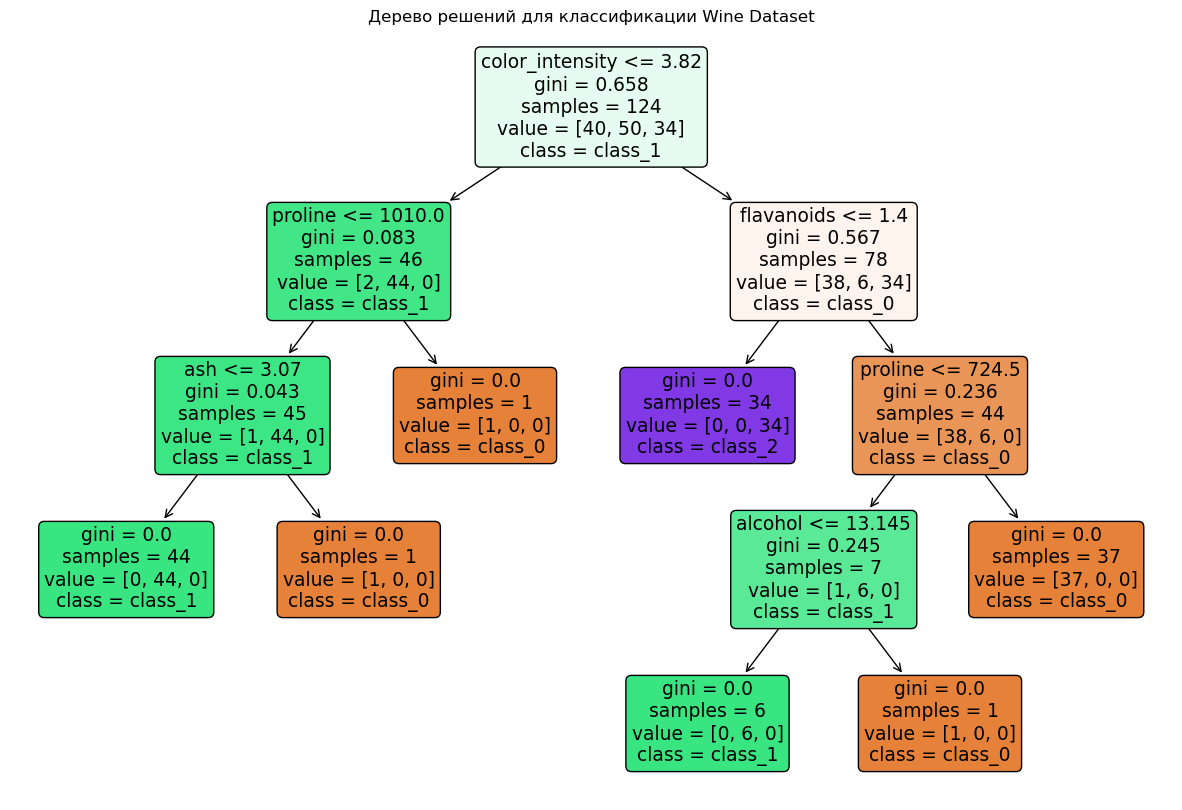

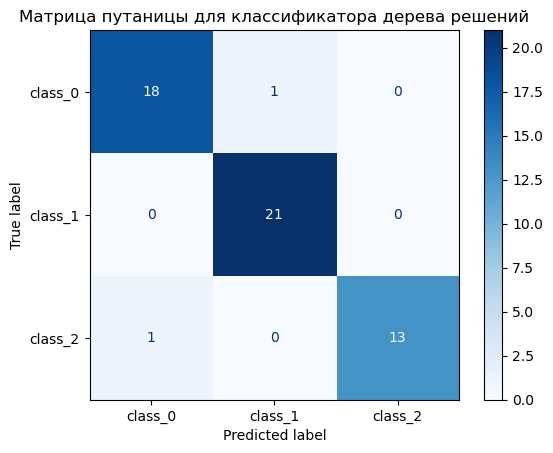

In [75]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

wine = load_wine()
X = wine.data  
y = wine.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#обучение классификатора дерева решений на обучающем наборе
tree_clf = DecisionTreeClassifier(random_state=42)  
tree_clf.fit(X_train, y_train)  

#оценка производительности на тестовом наборе
y_pred = tree_clf.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)  
print(f"Точность классификации на тестовом наборе: {accuracy:.2f}")

#визуализация дерева решений
plt.figure(figsize=(15, 10)) 
plot_tree(tree_clf, feature_names=wine.feature_names, class_names=list(wine.target_names), filled=True, rounded=True)
plt.title("Дерево решений для классификации Wine Dataset")
plt.show()

#визуализация матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=wine.target_names)
disp.plot(cmap='Blues')
plt.title("Матрица путаницы для классификатора дерева решений")
plt.show()

In [ ]:
Regression Exercises
Exercise 1: Linear Regression

Среднеквадратическая ошибка (MSE) на тестовом наборе: 4730676245.23
Коэффициент детерминации (R²) на тестовом наборе: 0.64


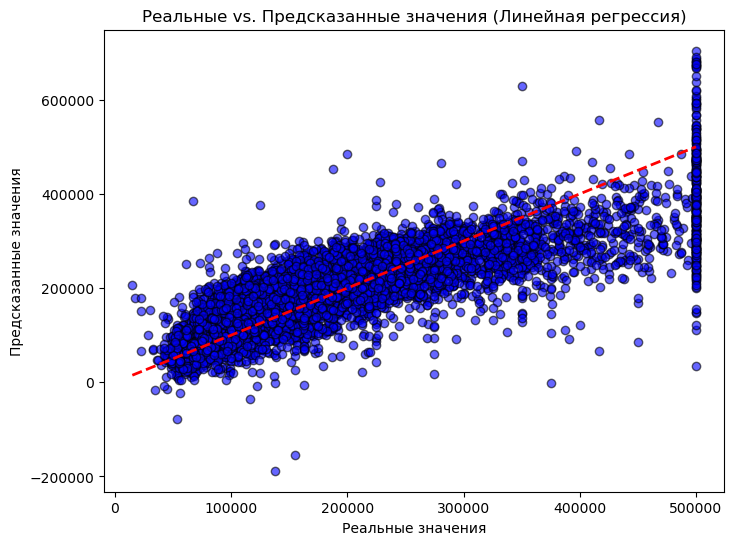

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("housing.csv")

data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

data = pd.get_dummies(data, columns=['ocean_proximity'])

#разделение на признаки (X) и целевую переменную (y)
X = data.drop("median_house_value", axis=1).values 
y = data["median_house_value"].values 

#разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#обучение модели линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 

#оценка модели на тестовом наборе
y_pred = lin_reg.predict(X_test)

#среднеквадратическая ошибка (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратическая ошибка (MSE) на тестовом наборе: {mse:.2f}")

#коэффициент детерминации (R²)
r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R²) на тестовом наборе: {r2:.2f}")

#визуализация предсказанных и реальных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs. Предсказанные значения (Линейная регрессия)")
plt.show()

Exercise 2: Ridge Regression

Среднеквадратическая ошибка (MSE) на тестовом наборе: 3112.97
Коэффициент детерминации (R²) на тестовом наборе: 0.42


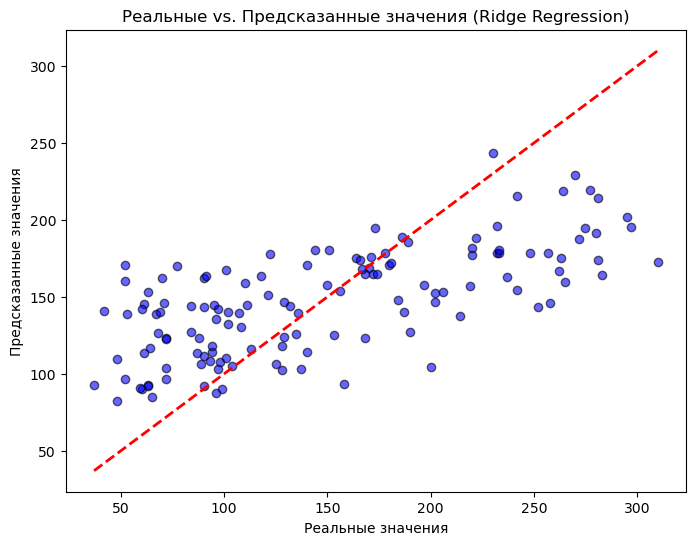

In [117]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

diabetes = load_diabetes()
X = diabetes.data  
y = diabetes.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#обучение модели регрессии гребня на обучающем наборе
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)  

#оценка производительности модели на тестовом наборе
y_pred = ridge.predict(X_test)  

#среднеквадратическая ошибка (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратическая ошибка (MSE) на тестовом наборе: {mse:.2f}")

#коэффициент детерминации (R²)
r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R²) на тестовом наборе: {r2:.2f}")

#визуализация предсказанных и реальных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs. Предсказанные значения (Ridge Regression)")
plt.show()

In [ ]:
Exercise 3: Decision Tree Regression

Среднеквадратическая ошибка (MSE) на тестовом наборе: 5486429566.74


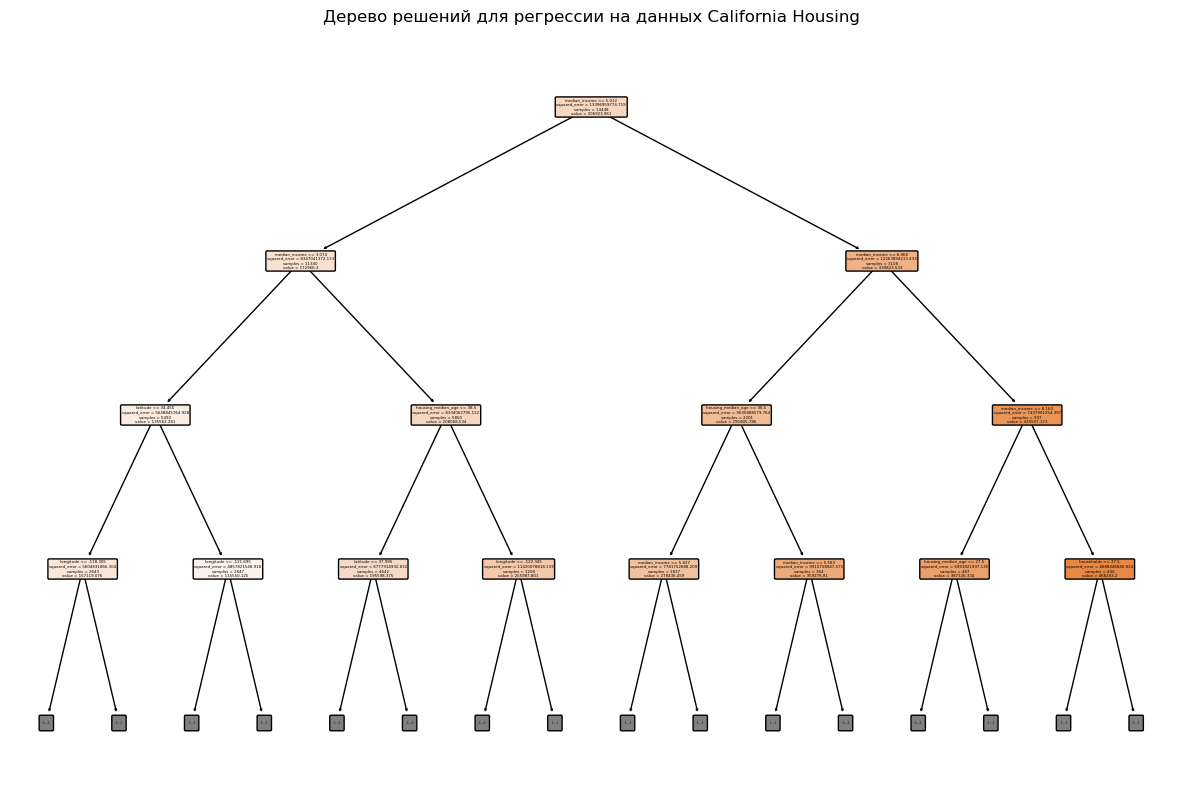

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("housing.csv")

# 2. Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop("median_house_value", axis=1) 
y = data["median_house_value"] 

#преобразование X в DataFrame (если тип — numpy массив)
X = pd.DataFrame(X, columns=data.columns[:-1])

#разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#обучение регрессора дерева решений с ограничением на глубину дерева
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)  # Ограничение на глубину дерева
tree_reg.fit(X_train, y_train)  # Обучение модели

#оценка модели на тестовом наборе
y_pred = tree_reg.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
print(f"Среднеквадратическая ошибка (MSE) на тестовом наборе: {mse:.2f}")

#визуализация дерева решений
plt.figure(figsize=(15, 10))  
plot_tree(tree_reg, feature_names=list(X.columns), filled=True, rounded=True, max_depth=3)
plt.title("Дерево решений для регрессии на данных California Housing")
plt.show()